# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from string import ascii_letters

In [51]:
df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [52]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [53]:
# your code here
df = df.drop(['Id'], axis=1)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [54]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
df2 = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
df2 = df2[df2.percent_missing>20]
df2

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [55]:
# your code here
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [56]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

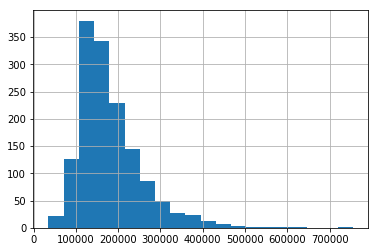

In [57]:
# your code here
df.SalePrice.hist(bins=20)

In [58]:
# your comment here

# Data is skewed on the left side as there seem to be some outliers with high Sale Prices which are most likely 
# linked to bigger & luxorious properties which are not the majority of the properties in the market, but still 
# are part of the offer. We see that most of the properties have the Sale Price somewhere between 100-150k.

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

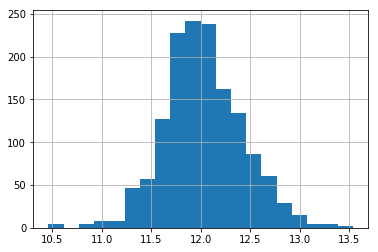

In [59]:
# your code here
# log
nat_log = df.SalePrice.apply(np.log) 
nat_log.hist(bins=20)

# natural logorithm seems to adjust the data fine to have the normal distribution; so I'll use this for 
# adjusted price

df['SalePriceAdjusted'] = nat_log

# Adjusting the Sale Price allows stacking the data closer together. 
# When plotting data in a scatter plot, this allows to have all data closer together, rather than having a 
# large scale and have the high values further away from the rest of the data.

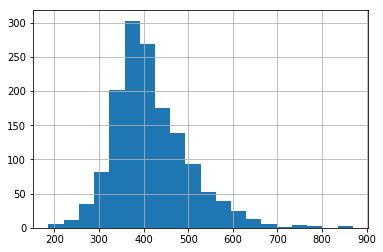

In [60]:
#square root:
square_root = df.SalePrice.apply(np.sqrt) 
square_root.hist(bins=20)

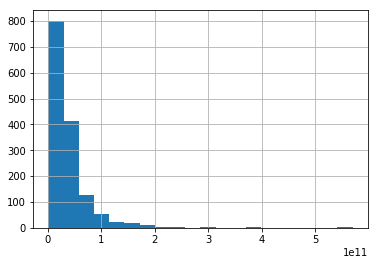

In [61]:
# power:
power_2 = np.power(df.SalePrice, 2)
power_2.hist(bins=20)

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

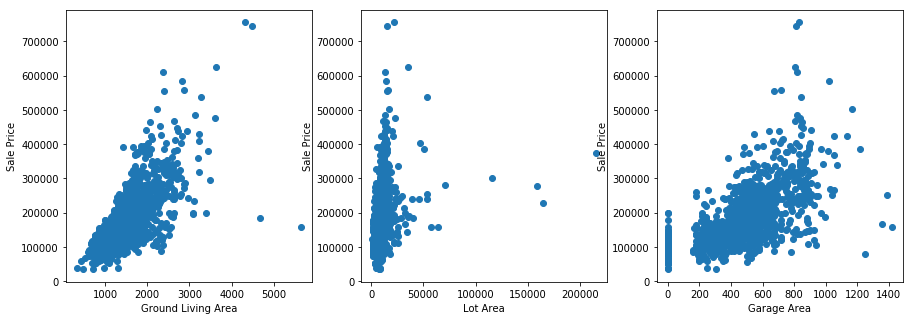

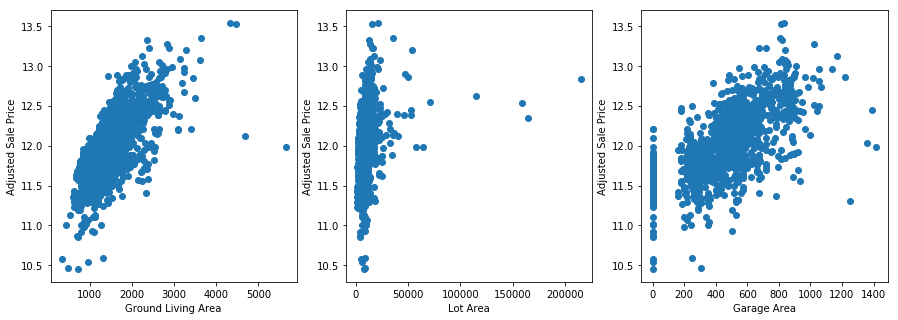

In [62]:
# your code here
# add cells as needed

# Size of the house:
# With base price:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(x = df.GrLivArea, y = df.SalePrice)
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')

plt.subplot(1,3,2)
plt.scatter(x = df.LotArea, y = df.SalePrice)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

plt.subplot(1,3,3)
plt.scatter(x = df.GarageArea, y = df.SalePrice)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

plt.show()

# With Adjusted price:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(x = df.GrLivArea, y = df.SalePriceAdjusted)
plt.xlabel('Ground Living Area')
plt.ylabel('Adjusted Sale Price')

plt.subplot(1,3,2)
plt.scatter(x = df.LotArea, y = df.SalePriceAdjusted)
plt.xlabel('Lot Area')
plt.ylabel('Adjusted Sale Price')

plt.subplot(1,3,3)
plt.scatter(x = df.GarageArea, y = df.SalePriceAdjusted)
plt.xlabel('Garage Area')
plt.ylabel('Adjusted Sale Price')

plt.show()

In [64]:
# Number of rooms & bathrooms vs Average House Price:
df['NbRooms'] = df.BedroomAbvGr + df.KitchenAbvGr
df['NbBathrooms'] = df.FullBath + df.HalfBath + df.BsmtFullBath + df.BsmtHalfBath

Text(0, 0.5, 'Sale Price Average')

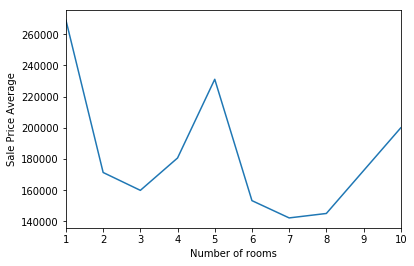

In [65]:
rooms_nb_price = df[['NbRooms', 'SalePrice']].groupby(['NbRooms']).agg('mean').reset_index()
rooms_nb_price.plot.line(x = 'NbRooms', y = 'SalePrice', legend=False)
plt.xlabel('Number of rooms')
plt.ylabel('Sale Price Average')

In [66]:
# We can see that the highest sale price on average is for houses with 1 and 5 rooms. It however seems weird that
# the highest average price is for houses with 1 room only. We can dig deeper into this to check what is this 
# related to. Most likely there's some missing data and therefore we're missing information to interpret data.

In [67]:
df[df.NbRooms==1]['BedroomAbvGr']
# Looks like the information for number of Bedrooms Above Ground for these properties is missing and therefore
# we arre getting errored information on the total number of rooms, which is only counting the kitchen, so we
# end up having 1 room. The best would be to remove these to get more accurate information.

53      0
189     0
1213    0
1270    0
Name: BedroomAbvGr, dtype: int64

In [68]:
df[(df.NbRooms==2)&(df.BedroomAbvGr==0)]['BedroomAbvGr']

634     0
1163    0
Name: BedroomAbvGr, dtype: int64

In [69]:
i = df[(df.NbRooms==1)&(df.BedroomAbvGr==0)|(df.NbRooms==2)&(df.BedroomAbvGr==0)].index
df = df.drop(i)

Text(0, 0.5, 'Sale Price Average')

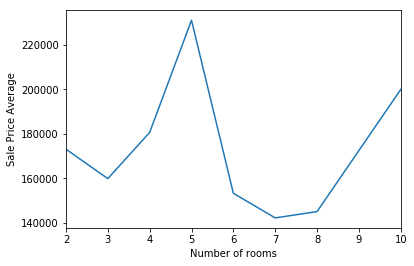

In [70]:
rooms_nb_price = df[['NbRooms', 'SalePrice']].groupby(['NbRooms']).agg('mean').reset_index()
rooms_nb_price.plot.line(x = 'NbRooms', y = 'SalePrice', legend=False)
plt.xlabel('Number of rooms')
plt.ylabel('Sale Price Average')

In [71]:
# Now we see that it's makes more sense. The price for properties with 2 rooms is a bit higher than 3 rooms, but 
# the difference is of 15k approximately and this could really be explained by their neighborhood, or there's 
# still some missing data.

In [72]:
df[(df.NbRooms==2)].SalePrice.max()

501837

In [73]:
df[(df.NbRooms==2)&(df.SalePrice>200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,NbRooms,NbBathrooms
46,50,RL,48.0,12822,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,8,2009,WD,Abnorml,239686,12.387085,2,3
153,20,RL,NaN,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,3,2008,WD,Normal,235000,12.367341,2,2
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,7,2009,New,Partial,501837,13.126031,2,3
326,120,RL,32.0,10846,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,5,2008,Con,Normal,324000,12.688499,2,4
378,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,6,2010,New,Partial,394432,12.885202,2,3
400,120,RL,38.0,14963,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,12,2008,WD,Normal,245500,12.411052,2,3
470,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,6,2010,WD,Normal,212000,12.264342,2,3
503,20,RL,100.0,15602,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,3,2010,WD,Normal,289000,12.574182,2,3
568,50,RL,79.0,12327,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,9,2009,WD,Normal,316600,12.665394,2,3
639,120,RL,53.0,3982,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,10,2006,New,Partial,264561,12.485827,2,3


In [74]:
df[(df.NbRooms==2)&(df.SalePrice>200)]['2ndFlrSF'].sort_values(ascending=False).head()

568    636
46     631
5      566
400      0
614      0
Name: 2ndFlrSF, dtype: int64

In [75]:
df[(df.NbRooms==3)&(df.SalePrice>200)]['2ndFlrSF'].sort_values(ascending=False).head()

735     888
1236    862
348     862
971     862
652     807
Name: 2ndFlrSF, dtype: int64

In [ ]:
# Comparing the price and square feet for 2 room & 3 room prices, this looks coherent, so we won't touch these.

Text(0, 0.5, 'Sale Price Average')

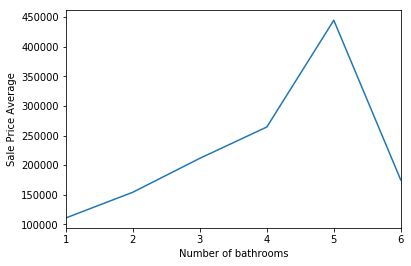

In [76]:
bathrooms_nb_price = df[['NbBathrooms', 'SalePrice']].groupby(['NbBathrooms']).agg('mean').reset_index()
bathrooms_nb_price.plot.line(x = 'NbBathrooms', y = 'SalePrice', legend=False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Sale Price Average')

In [77]:
# Similar to number of rooms, the houses with 5 bathrooms have the highest price. Here however, the price is 
# increasing as the number of bathrooms increase which makes perfect sense. There is however a drop in price for
# houses with 6 bathrooms. We can investigate further here to check what's causing this.

In [78]:
# Check for house prices with 6 bathrooms:
df[df.NbBathrooms==6]['Neighborhood'].value_counts()

# We see that these houses are in Edwards and NAmes areas. If we look further down in the graph for price 
# distribution per neighborhood, we see that these are neighborhoods where house price tends to be lower. 
# So seems like there are houses that are bigger in these neighborhoods, but tend to be cheaper than smaller 
# houses in better areas. 

Edwards    2
NAmes      1
Name: Neighborhood, dtype: int64

In [79]:
df[df.NbBathrooms==6][['YearBuilt','YearRemodAdd']]
# They are also relatively quite old houses and it has been a while since they have been remodeled.

,YearBuilt,YearRemodAdd
738,1987,1988
921,1900,2003
1350,1969,1969


In [80]:
# How long the house has been built or remodeled:
df['HouseAge'] = datetime.datetime.now().year - df.YearBuilt
df['HouseRemodSince'] = datetime.datetime.now().year - df.YearRemodAdd
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,NbRooms,NbBathrooms,HouseAge,HouseRemodSince
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,12.247694,4,4,16,16
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,12.109011,4,3,43,43
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,12.317167,4,4,18,17
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,11.849398,4,2,104,49
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,12.429216,5,4,19,19


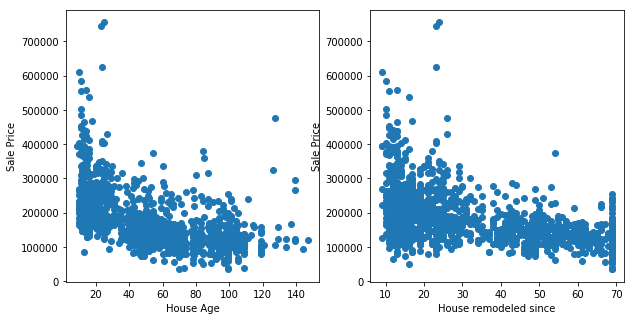

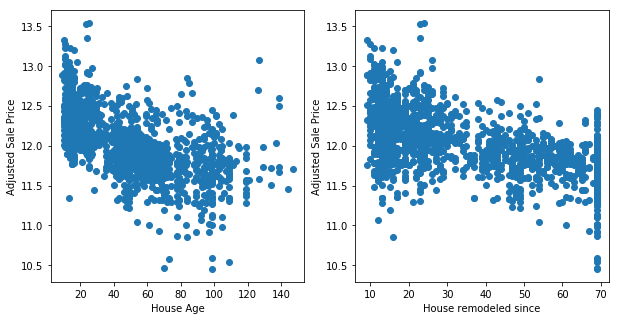

In [81]:
# Sale Price:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(x = df.HouseAge, y = df.SalePrice)
plt.xlabel('House Age')
plt.ylabel('Sale Price')

plt.subplot(1,2,2)
plt.scatter(x = df.HouseRemodSince, y = df.SalePrice)
plt.xlabel('House remodeled since')
plt.ylabel('Sale Price')

plt.show()

# Sale Price adjusted:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(x = df.HouseAge, y = df.SalePriceAdjusted)
plt.xlabel('House Age')
plt.ylabel('Adjusted Sale Price')

plt.subplot(1,2,2)
plt.scatter(x = df.HouseRemodSince, y = df.SalePriceAdjusted)
plt.xlabel('House remodeled since')
plt.ylabel('Adjusted Sale Price')

plt.show()

In [82]:
# There's a lot of noise in the data, but we can manage to see a trend that when house is older or it has been
# remodeled since longer time, it's price tends to go down. To make the reading of the data easier, we could 
# create bins for the years and see how this then affects the price.

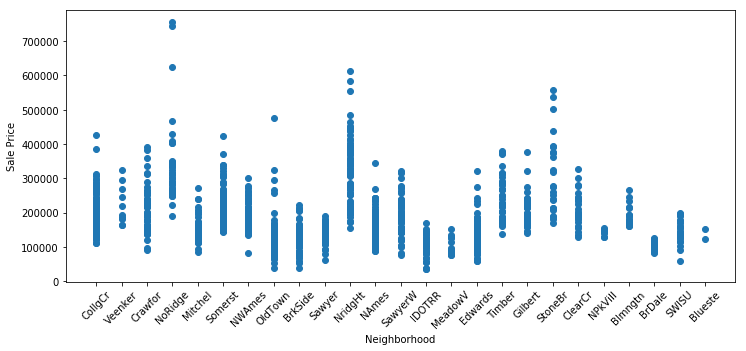

In [84]:
# Neighborhood of the house (Neighborhood):
plt.figure(figsize=(12, 5))

ax = plt.scatter(x = df.Neighborhood, y = df.SalePrice)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')

plt.show()

In [85]:
# We can see that there are some neighbourhoods where the minimum and maximum price of houses is higher than 
# others. This can give us a general idea of those neighborhoods that are more valued, however this doesn't give
# the whole picture as we don't know if the size of the house has also anything to do with the fact that the price
# is higher. If we disregard the latter, we can conclude that the most expensive is NoRidge neighborhood, 
# followed by NridgHT and StoneBr.

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

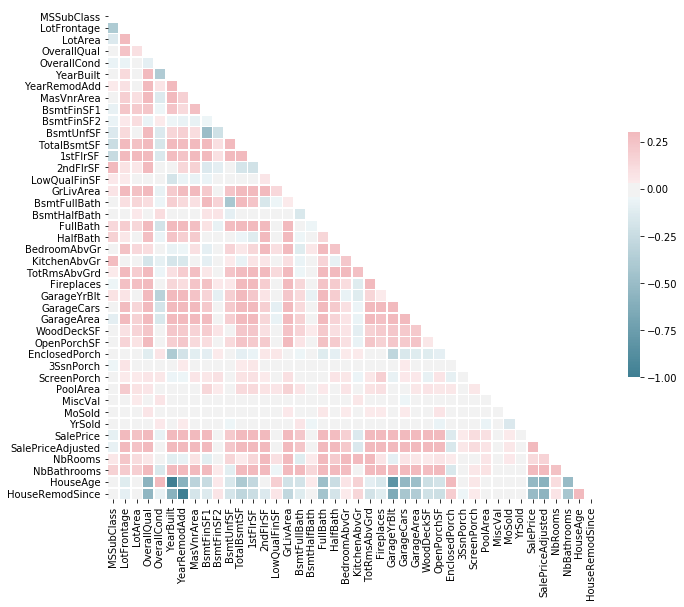

In [86]:
# your code here

# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [87]:
# your comment here
top_corr = df.corr()['SalePrice'].sort_values(ascending=False).head(11)
top_corr[1:]

SalePriceAdjusted    0.948126
OverallQual          0.790095
GrLivArea            0.709671
GarageCars           0.640220
GarageArea           0.621975
NbBathrooms          0.614872
TotalBsmtSF          0.612296
1stFlrSF             0.604566
FullBath             0.575322
TotRmsAbvGrd         0.539982
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Sale Price')

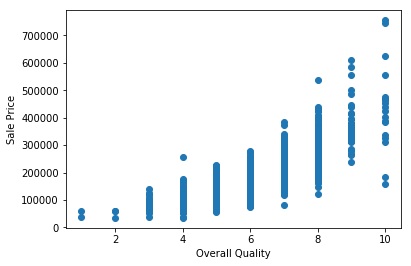

In [97]:
# Plot Sale Price vs Overall Quality:
plt.scatter(x = df.OverallQual, y = df.SalePrice)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

In [105]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
# We see that as the quality of the house goes up the sale price increases as well.

Text(0, 0.5, 'Sale Price')

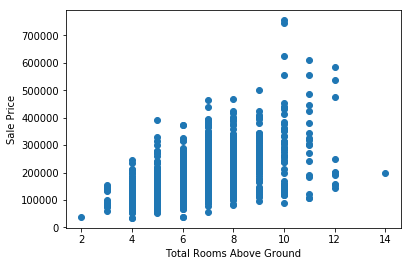

In [106]:
# Plot total Rooms Above Ground vs Sale Price:
plt.scatter(x = df.TotRmsAbvGrd, y = df.SalePrice)
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')

In [107]:
# There's some correlation, and indeed as the numer of rooms goes up, the Sale Price tends to increase; however
# there's still a quite high variation in Sale Price for each number of rooms, so this clearly is not the main 
# factor to impact the Sale Price.

Text(0, 0.5, 'Sale Price')

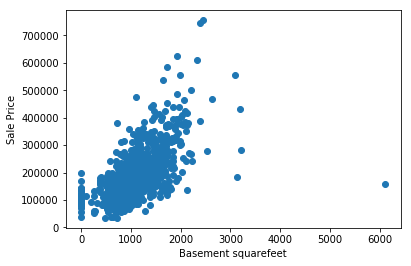

In [122]:
# Plot Total Basement squarefeet vs Sale Price:
plt.scatter(x = df.TotalBsmtSF, y = df.SalePrice)

df.GrLivArea
plt.xlabel('Basement squarefeet')
plt.ylabel('Sale Price')

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

### OverallQual

The scale for quality measurement is 1-10. As the quality of the house goes up the average sale price increases as well.

Text(0, 0.5, 'Sale Price')

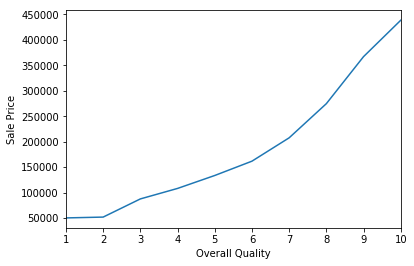

In [137]:
overallQual_price = df[['OverallQual', 'SalePrice']].groupby(['OverallQual']).agg('mean').reset_index()
overallQual_price.plot.line(x = 'OverallQual', y = 'SalePrice', legend=False)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

### Ground Living Area & Garage Area

Ground Living Area has great impact on the sale price as we see from the below plot on the left. Similary the Sale Price also increases as the Garage Area is bigger, but there's however less correlation than with Ground Living Area. This makes sense, as bigger houses tend to have bigger garage area for the tennants to park all their cars. However this is less significant than house size itself.

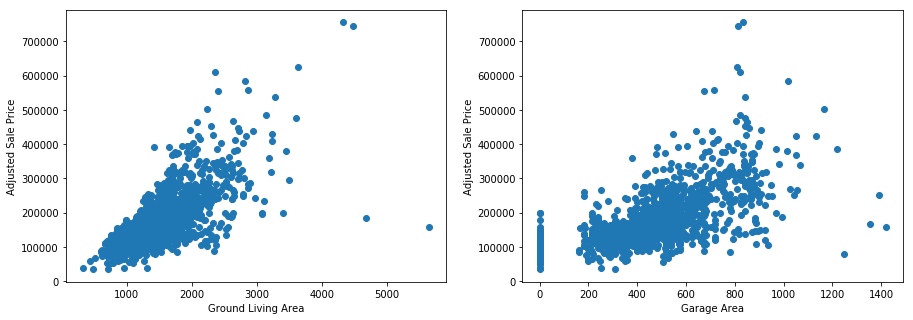

In [134]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(x = df.GrLivArea, y = df.SalePrice)
plt.xlabel('Ground Living Area')
plt.ylabel('Adjusted Sale Price')

plt.subplot(1,2,2)
plt.scatter(x = df.GarageArea, y = df.SalePrice)
plt.xlabel('Garage Area')
plt.ylabel('Adjusted Sale Price')

plt.show()

### NbBathrooms 

Houses with 5 bathrooms have the highest price. The price is increasing as the number of bathrooms increase which makes perfect sense. There is however a drop in price for houses with 6 bathrooms. 

Text(0, 0.5, 'Sale Price Average')

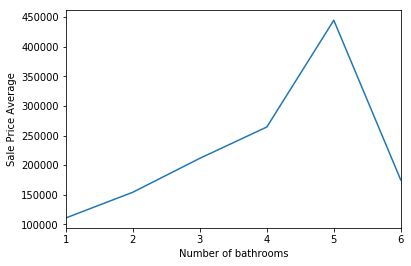

In [126]:
bathrooms_nb_price = df[['NbBathrooms', 'SalePrice']].groupby(['NbBathrooms']).agg('mean').reset_index()
bathrooms_nb_price.plot.line(x = 'NbBathrooms', y = 'SalePrice', legend=False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Sale Price Average')

There's however drop in price for houses with 6 bathrooms. Below we see that these houses are in Edwards and NAmes areas. If we look further down in the graph for price  distribution per neighborhood, we see that these are neighborhoods where house price tends to be lower.  So seems like there are houses that are bigger in these neighborhoods, but tend to be cheaper than smaller  houses in better areas. 

In [127]:
df[df.NbBathrooms==6]['Neighborhood'].value_counts()

Edwards    2
NAmes      1
Name: Neighborhood, dtype: int64

Below we see also that these houses are relatively quite old and it has been a while since they have been remodeled, so that explains also why despite the number or bathrooms (and size of the house) the sale price is lower than other smaller houses.

In [128]:
df[df.NbBathrooms==6][['YearBuilt','YearRemodAdd']]

,YearBuilt,YearRemodAdd
921,1900,2003
738,1987,1988
1350,1969,1969


### Total Basement squarefeet

There's also a correlation between the Total Basement Square feet and the Sale Price, which makes sense. As we saw before, houses with bigger Ground Living Area and Garage area are more expensive. These houses will generaly have bigger basement area as the way houses are built, most of the time Basement are is all the area below the Ground Living Area and Garage area.

Text(0, 0.5, 'Sale Price')

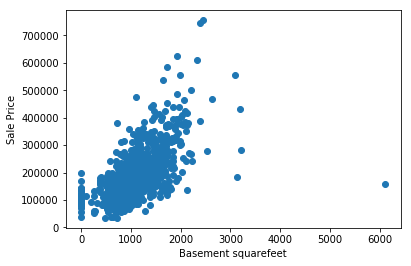

In [131]:
plt.scatter(x = df.TotalBsmtSF, y = df.SalePrice)

df.GrLivArea
plt.xlabel('Basement squarefeet')
plt.ylabel('Sale Price')

### Neighborhood

Below we see that there are some neighbourhoods where the minimum and maximum price of houses is higher than others. This gives us a general idea of those neighborhoods that are more valued. We can conclude that the most expensive is NoRidge neighborhood, followed by NridgHT and StoneBr. We however must not forget that the prices also are impacted by the overall quality of the houses and their size.

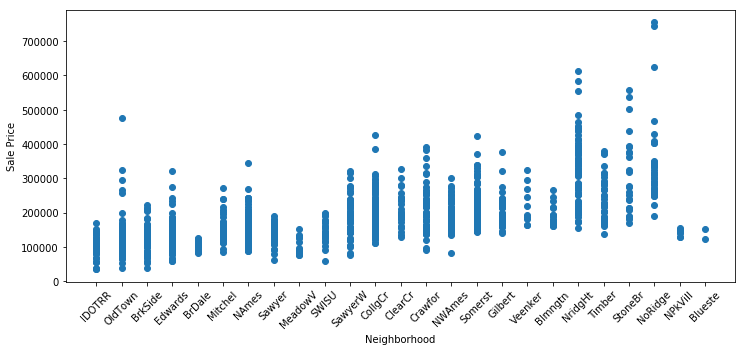

In [130]:
plt.figure(figsize=(12, 5))

ax = plt.scatter(x = df.Neighborhood, y = df.SalePrice)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')

plt.show()